## We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

**For each question, make sure to**:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## Load Data

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Do smokers have higher insurance charges than non-smokers?

### State your Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: There is no difference in insurance charges for Smoker's and Non-Smokers.

**Alternate Hypothesis**: Insurance charges for Smokers are significantly higher when compared to Non-Smokers.

### Select the correct test according to the data type and number of samples

- We are comparing smokers vs nonsmokers in what their insurances charges are. 
- The test to perform would be the independent t test with the assumptions:
 - No significant outliers
 - Normality
 - Equal Variance

In [4]:
smokes_charges = df.loc[df['smoker'] == 'yes', ['charges', 'smoker']]
smokes_charges

,charges,smoker
0,16884.92400,yes
11,27808.72510,yes
14,39611.75770,yes
19,36837.46700,yes
23,37701.87680,yes
...,...,...
1313,36397.57600,yes
1314,18765.87545,yes
1321,28101.33305,yes
1323,43896.37630,yes


In [5]:
nosmoke_charges = df.loc[df['smoker'] == 'no', ['charges', 'smoker']]
nosmoke_charges

,charges,smoker
1,1725.55230,no
2,4449.46200,no
3,21984.47061,no
4,3866.85520,no
5,3756.62160,no
...,...,...
1332,11411.68500,no
1333,10600.54830,no
1334,2205.98080,no
1335,1629.83350,no


In [6]:
combined_df = pd.concat([smokes_charges, nosmoke_charges], axis=0)
combined_df


,charges,smoker
0,16884.9240,yes
11,27808.7251,yes
14,39611.7577,yes
19,36837.4670,yes
23,37701.8768,yes
...,...,...
1332,11411.6850,no
1333,10600.5483,no
1334,2205.9808,no
1335,1629.8335,no


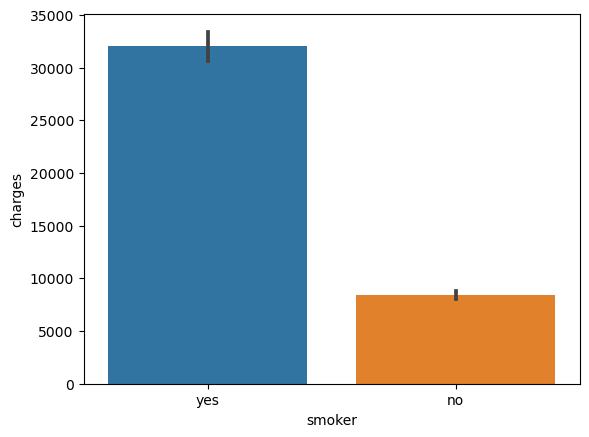

In [8]:
## visualizing means.
ax = sns.barplot(data=combined_df, x='smoker', y='charges', errorbar = 'ci')



In [11]:
smokes_group = smokes_charges['charges']
nosmokes_group = nosmoke_charges['charges']
display(smokes_group.head(), nosmokes_group.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [12]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_smokers = np.abs(stats.zscore(smokes_group)) > 3
print(f"There are {is_outlier_smokers.sum()} outliers in the smoker group out of {len(smokes_group)})")

There are 0 outliers in the smoker group out of 274)


In [14]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_nonsmokers = np.abs(stats.zscore(nosmokes_group)) > 3
print(f"There are {is_outlier_nonsmokers.sum()} outliers in the male group of out of {len(nosmokes_group)}.")

There are 24 outliers in the male group of out of 1064.


In [15]:
## removing outliers from nonsmoker_group
nosmokes_group = nosmokes_group.loc[~is_outlier_nonsmokers]
nosmokes_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

### Checking for normality

- The n for both groups is above 15 so we can assume normality

### Checking for equal variance

In [16]:
result = stats.levene(smokes_group, nosmokes_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


- The p value is less than .05 which means that we have to reject the null hypothesis that the variance for the smokes group and nosmokes group is equal.
- We will perform an independent t-test with equal_var equal to false

In [17]:
result = stats.ttest_ind(smokes_group, nosmokes_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

### Interpret your p-value and reject or fail to reject your null hypothesis

- The Welch's T-Test's p-value is less than alpha at .05 therefore  we reject the null hypothesis and support the alternative hypothesis.
- There is a significant difference in insurance charges for smokers and non smokers.

### How much more are smokers paying vs non smokers for insurance?

In [26]:
print(f"The mean insurance charges for smokers is {smokes_group.mean():.2f}")
print(f"The mean insurance charges for non-smokers is {nosmokes_group.mean():.2f}")

The mean insurance charges for smokers is 32050.23
The mean insurance charges for non-smokers is 7939.86


In [25]:
print(f'Smokers pay {32050.23 - 7939.86} more than non-smokers')

Smokers pay 24110.37 more than non-smokers


In [ ]:
## visualizing means. ci=68 makes easier to compare error bars 
ax = sns.barplot(data=df, x='region', y='charges', errorbar=('ci', 68))

## Are men more likely to smoke than women?

### State your Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: There is no difference in likely to smoke between men and women.

**Alternate Hypothesis**: There is a significant difference in likeliness to smoke between genders.

### Select the correct test according to the data type and number of samples

- We are comparing men vs women in their likeliness in smoking
- There are 2 groups and they are categorical. The best test perform is the chi-square.
- Categorical groups contain nominal and ordinal data.
- The outcomes are independent.

### Groups

In [27]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

### Contingency Table

In [28]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


### Stat Test

In [29]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

### Interpret your p-value and reject or fail to reject your null hypothesis

In [30]:
#print p and see if it is less than .05
print(p)
p <.05

0.006548143503580696


True

- p value is less than .05 therefore the result will be significant.
- Because the p value is less than .05 we reject the null hypothesis that men and woman have the same likelihood of smoking.
- We accept the alternate hypothesis that men are more likely to smoke than woman.

### Visualize Means

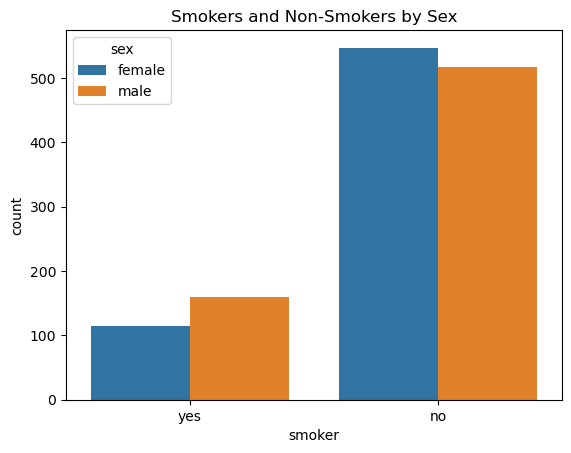

In [31]:
ax = sns.countplot(data=df, x='smoker', hue='sex')

# Add title to the plot
ax.set_title('Smokers and Non-Smokers by Sex');

- We can clearly see that male smokers are more prevalant than female smokers.

## Do different regions have different charges, on average?

### State your Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: There is no difference in mean insurance charges for different regions

**Alternate Hypothesis**: There is a significant difference in average insurance means in different regions

### Select Proper Hypothesis Test

- We are comparing numerical means for more than 2 regions
- Appropriate Test will be ANOVA which has the assumptions:
  - No significant outliers
  - Normality
  - Equal Variance

In [32]:
## Create groups dictionary
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Test Assumptions

#### Assumption of Normality

In [33]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [34]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df



,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- The regions are not in a normal distribution

In [35]:
result = stats.levene(*groups.values())
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)
True


- p value is less than .05 which means that there is not equal variance between groups so we will reject the null hypothesis that our groups have equal variance and accept that they do not have equal variance.

### Run a parametric test

**The Kruskal-Wallis test will be performed because it alligns with the original parametric test which told us that there is not equal variance between groups.**

In [36]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal( *groups.values())
print(result)
print(result.pvalue<.05)

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)
False


### Interpret your p-value and reject or fail to reject your null hypothesis

- p value is greater than alpha of .05 which means we fail to reject the null hypothesis that the regions have significant differences in insurance charges.

### Visualize Means

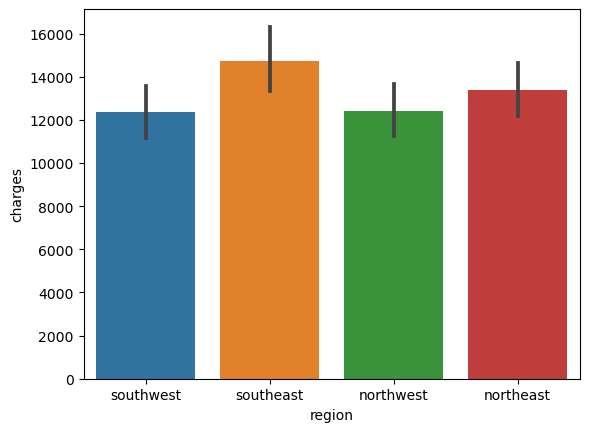

In [37]:
## visualizing means
ax = sns.barplot(data=df, x='region', y='charges', errorbar='ci')